<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 19 Class 2 02/02</h1>
</div>

## Objectives for this week:
* Data Visualizations continued

## Todays Agenda
* SQL
* Working with different data (csv, xls, json, sql)
* Inputting/outputting  data in numpy/pandas
* Ways to visualize data





<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Homework Problem</h1>
</div>

### Exercise 3

Given a list of the scores of different students, `items`, where `items[i] = [ID_i, score_i]` represents one score from a student with `ID_i`, calculate each student's top five average.

Return the answer as an array of pairs result, where `result[j] = [ID_j, topFiveAverage_j]` represents the student with IDj and their top five average. Sort result by `ID_j` in increasing order.

A student's top five average is calculated by taking the sum of their top five scores and dividing it by 5 using integer division.

 

Example 1:

Input: 
`items = [[1,91],[1,92],[2,93],[2,97],[1,60],[2,77],[1,65],[1,87],[1,100],[2,100],[2,76]]`  
Output: `[[1,87],[2,88]]`  
Explanation:  
The student with ID = 1 got scores 91, 92, 60, 65, 87, and 100. Their top five average is (100 + 92 + 91 + 87 + 65) / 5 = 87.
The student with ID = 2 got scores 93, 97, 77, 100, and 76. Their top five average is (100 + 97 + 93 + 77 + 76) / 5 = 88.6, but with integer division their average converts to 88.

Example 2:

Input:  
`items = [[1,100],[7,100],[1,100],[7,100],[1,100],[7,100],[1,100],[7,100],[1,100],[7,100]]`  
Output:  
`[[1,100],[7,100]]`  

 

Constraints:

    1 <= items.length <= 1000
    items[i].length == 2
    1 <= IDi <= 1000
    0 <= scorei <= 100
    For each ID_i, there will be at least five scores.



In [ ]:
def ex3(l):
    pass

try:
    assert(
    ex3([[1,91],[1,92],[2,93],[2,97],[1,60],[2,77],[1,65],\
         [1,87],[1,100],[2,100],[2,76]]) == [[1,87],[2,88]]
    )
    assert(
    ex3([[1,100],[7,100],[1,100],[7,100],[1,100],[7,100],\
         [1,100],[7,100],[1,100],[7,100]]) == [[1,100],[7,100]]
    )    
    print("solution is correct")
except AssertionError:
    print("solution is incorrect")

In [ ]:
def ex2(l):       
    d = {}    
    for i,val in l:       
        d[i] = d.get(i, []) + [val]    
        l = []    
        for i, val in d.items():        
            d[i] = sorted(val)[-5:]         
            d[i] = int(sum(d[i]) / 5)        
            l.append([i, d[i]])        
            return l

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>pyplot</h1>
</div>

Intro to pyplot
===============

`matplotlib.pyplot` is a collection of functions
that make matplotlib work like MATLAB.
Each ``pyplot`` function makes
some change to a figure: e.g., creates a figure, creates a plotting area
in a figure, plots some lines in a plotting area, decorates the plot
with labels, etc.

In `matplotlib.pyplot` various states are preserved
across function calls, so that it keeps track of things like
the current figure and plotting area, and the plotting
functions are directed to the current axes (please note that "axes" here
and in most places in the documentation refers to the *axes*
`part of a figure <figure_parts>`
and not the strict mathematical term for more than one axis).

Generating visualizations with pyplot is very quick:



In [ ]:
%matplotlib inline



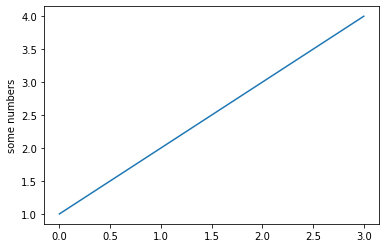

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis
from 1-4.  If you provide a single list or array to
`~.pyplot.plot`, matplotlib assumes it is a
sequence of y values, and automatically generates the x values for
you.  Since python ranges start with 0, the default x vector has the
same length as y but starts with 0.  Hence the x data are
``[0, 1, 2, 3]``.

`~.pyplot.plot` is a versatile function, and will take an arbitrary number of
arguments.  For example, to plot x versus y, you can write:



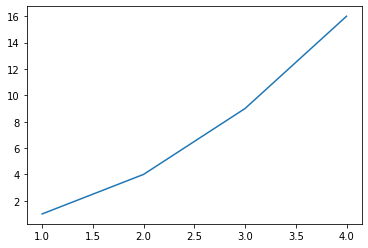

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

Formatting the style of your plot
---------------------------------

For every x, y pair of arguments, there is an optional third argument
which is the format string that indicates the color and line type of
the plot.  The letters and symbols of the format string are from
MATLAB, and you concatenate a color string with a line style string.
The default format string is 'b-', which is a solid blue line.  For
example, to plot the above with red circles, you would issue



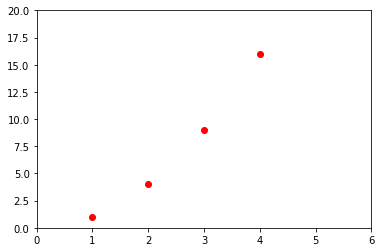

In [12]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

See the `~.pyplot.plot` documentation for a complete
list of line styles and format strings.  The
`~.pyplot.axis` function in the example above takes a
list of ``[xmin, xmax, ymin, ymax]`` and specifies the viewport of the
axes.

If matplotlib were limited to working with lists, it would be fairly
useless for numeric processing.  Generally, you will use `numpy
<http://www.numpy.org>`_ arrays.  In fact, all sequences are
converted to numpy arrays internally.  The example below illustrates
plotting several lines with different format styles in one function call
using arrays.



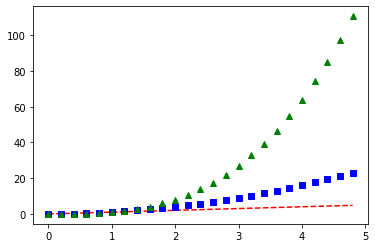

In [4]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [5]:
s = print("hello")
s

hello


In [ ]:
# wouldn't assign it, once we call .plot, we have a new chart


Plotting with keyword strings
=============================

There are some instances where you have data in a format that lets you
access particular variables with strings. For example, with
`numpy.recarray` or `pandas.DataFrame`.

Matplotlib allows you provide such an object with
the ``data`` keyword argument. If provided, then you may generate plots with
the strings corresponding to these variables.



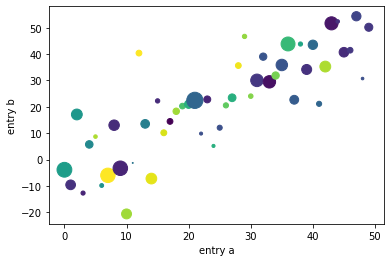

In [23]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


Plotting with categorical variables
===================================

It is also possible to create a plot using categorical variables.
Matplotlib allows you to pass categorical variables directly to
many plotting functions. For example:



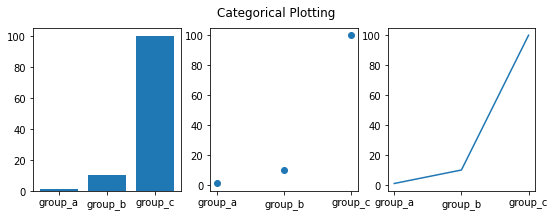

In [25]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


Controlling line properties
===========================

Lines have many attributes that you can set: linewidth, dash style,
antialiased, etc; see `matplotlib.lines.Line2D`.  There are
several ways to set line properties

* Use keyword args::

      plt.plot(x, y, linewidth=2.0)


* Use the setter methods of a ``Line2D`` instance.  ``plot`` returns a list
  of ``Line2D`` objects; e.g., ``line1, line2 = plot(x1, y1, x2, y2)``.  In the code
  below we will suppose that we have only
  one line so that the list returned is of length 1.  We use tuple unpacking with
  ``line,`` to get the first element of that list::

      line, = plt.plot(x, y, '-')
      line.set_antialiased(False) # turn off antialiasing

* Use `~.pyplot.setp`.  The example below
  uses a MATLAB-style function to set multiple properties
  on a list of lines.  ``setp`` works transparently with a list of objects
  or a single object.  You can either use python keyword arguments or
  MATLAB-style string/value pairs::

      lines = plt.plot(x1, y1, x2, y2)
      # use keyword args
      plt.setp(lines, color='r', linewidth=2.0)
      # or MATLAB style string value pairs
      plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

```
Here are the available `~.lines.Line2D` properties.

======================  ==================================================
Property                Value Type
======================  ==================================================
alpha                   float
animated                [True | False]
antialiased or aa       [True | False]
clip_box                a matplotlib.transform.Bbox instance
clip_on                 [True | False]
clip_path               a Path instance and a Transform instance, a Patch
color or c              any matplotlib color
contains                the hit testing function
dash_capstyle           [``'butt'`` | ``'round'`` | ``'projecting'``]
dash_joinstyle          [``'miter'`` | ``'round'`` | ``'bevel'``]
dashes                  sequence of on/off ink in points
data                    (np.array xdata, np.array ydata)
figure                  a matplotlib.figure.Figure instance
label                   any string
linestyle or ls         [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'steps'`` | ...]
linewidth or lw         float value in points
marker                  [ ``'+'`` | ``','`` | ``'.'`` | ``'1'`` | ``'2'`` | ``'3'`` | ``'4'`` ]
markeredgecolor or mec  any matplotlib color
markeredgewidth or mew  float value in points
markerfacecolor or mfc  any matplotlib color
markersize or ms        float
markevery               [ None | integer | (startind, stride) ]
picker                  used in interactive line selection
pickradius              the line pick selection radius
solid_capstyle          [``'butt'`` | ``'round'`` | ``'projecting'``]
solid_joinstyle         [``'miter'`` | ``'round'`` | ``'bevel'``]
transform               a matplotlib.transforms.Transform instance
visible                 [True | False]
xdata                   np.array
ydata                   np.array
zorder                  any number
======================  ==================================================
```

To get a list of settable line properties, call the
`~.pyplot.setp` function with a line or lines as argument

```ipython

    In [69]: lines = plt.plot([1, 2, 3])

    In [70]: plt.setp(lines)
      alpha: float
      animated: [True | False]
      antialiased or aa: [True | False]
      ...snip
```


Working with multiple figures and axes
======================================

MATLAB, and :mod:`.pyplot`, have the concept of the current figure
and the current axes.  All plotting functions apply to the current
axes.  The function `~.pyplot.gca` returns the current axes (a
`matplotlib.axes.Axes` instance), and `~.pyplot.gcf` returns the current
figure (a `matplotlib.figure.Figure` instance). Normally, you don't have to
worry about this, because it is all taken care of behind the scenes.  Below
is a script to create two subplots.



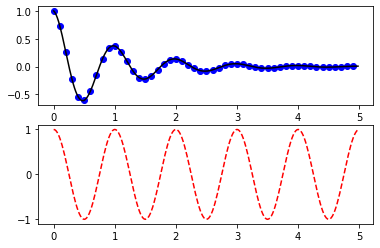

In [26]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(2,1,1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(2,1,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The `~.pyplot.figure` call here is optional because
``figure(1)`` will be created by default, just as a ``subplot(111)``
will be created by default if you don't manually specify any axes.  The
`~.pyplot.subplot` call specifies ``numrows,
numcols, plot_number`` where ``plot_number`` ranges from 1 to
``numrows*numcols``.  The commas in the ``subplot`` call are
optional if ``numrows*numcols<10``.  So ``subplot(211)`` is identical
to ``subplot(2, 1, 1)``.

You can create an arbitrary number of subplots
and axes.  If you want to place an axes manually, i.e., not on a
rectangular grid, use `~.pyplot.axes`,
which allows you to specify the location as ``axes([left, bottom,
width, height])`` where all values are in fractional (0 to 1)
coordinates. 


You can create multiple figures by using multiple
`~.pyplot.figure` calls with an increasing figure
number.  Of course, each figure can contain as many axes and subplots
as your heart desires::

    import matplotlib.pyplot as plt
    plt.figure(1)                # the first figure
    plt.subplot(211)             # the first subplot in the first figure
    plt.plot([1, 2, 3])
    plt.subplot(212)             # the second subplot in the first figure
    plt.plot([4, 5, 6])


    plt.figure(2)                # a second figure
    plt.plot([4, 5, 6])          # creates a subplot(111) by default

    plt.figure(1)                # figure 1 current; subplot(212) still current
    plt.subplot(211)             # make subplot(211) in figure1 current
    plt.title('Easy as 1, 2, 3') # subplot 211 title

You can clear the current figure with `~.pyplot.clf`
and the current axes with `~.pyplot.cla`.  If you find
it annoying that states (specifically the current image, figure and axes)
are being maintained for you behind the scenes, don't despair: this is just a thin
stateful wrapper around an object oriented API, which you can use
instead (see :doc:`/tutorials/intermediate/artists`)

If you are making lots of figures, you need to be aware of one
more thing: the memory required for a figure is not completely
released until the figure is explicitly closed with
`~.pyplot.close`.  Deleting all references to the
figure, and/or using the window manager to kill the window in which
the figure appears on the screen, is not enough, because pyplot
maintains internal references until `~.pyplot.close`
is called.


Working with text
=================

`~.pyplot.text` can be used to add text in an arbitrary location, and
`~.pyplot.xlabel`, `~.pyplot.ylabel` and `~.pyplot.title` are used to add
text in the indicated locations (see :doc:`/tutorials/text/text_intro` for a
more detailed example)



r'$\mu=100,\ \sigma=15$'

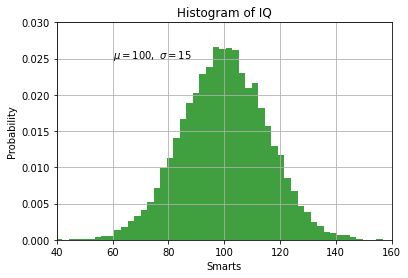

In [27]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')   # LaTex what used in jupyter to get math symbols
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the `~.pyplot.text` functions return a `matplotlib.text.Text`
instance.  Just as with with lines above, you can customize the properties by
passing keyword arguments into the text functions or using `~.pyplot.setp`::

  t = plt.xlabel('my data', fontsize=14, color='red')

These properties are covered in more detail in :doc:`/tutorials/text/text_props`.


Using mathematical expressions in text
--------------------------------------

matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression $\sigma_i=15$ in the title,
you can write a TeX expression surrounded by dollar signs::

    plt.title(r'$\sigma_i=15$')

The ``r`` preceding the title string is important -- it signifies
that the string is a *raw* string and not to treat backslashes as
python escapes.  matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts -- for details see
:doc:`/tutorials/text/mathtext`.  Thus you can use mathematical text across platforms
without requiring a TeX installation.  For those who have LaTeX and
dvipng installed, you can also use LaTeX to format your text and
incorporate the output directly into your display figures or saved
postscript -- see :doc:`/tutorials/text/usetex`.


Annotating text
---------------

The uses of the basic `~.pyplot.text` function above
place text at an arbitrary position on the Axes.  A common use for
text is to annotate some feature of the plot, and the
`~.pyplot.annotate` method provides helper
functionality to make annotations easy.  In an annotation, there are
two points to consider: the location being annotated represented by
the argument ``xy`` and the location of the text ``xytext``.  Both of
these arguments are ``(x, y)`` tuples.



In [ ]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

In this basic example, both the ``xy`` (arrow tip) and ``xytext``
locations (text location) are in data coordinates.  There are a
variety of other coordinate systems one can choose -- see
`annotations-tutorial` and `plotting-guide-annotation` for
details.  More examples can be found in
:doc:`/gallery/text_labels_and_annotations/annotation_demo`.


Logarithmic and other nonlinear axes
====================================

`matplotlib.pyplot` supports not only linear axis scales, but also
logarithmic and logit scales. This is commonly used if data spans many orders
of magnitude. Changing the scale of an axis is easy:

    plt.xscale('log')

An example of four plots with the same data and different scales for the y axis
is shown below.



In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Lab</h1>
</div>

For this lab, we'll be using the `flights.txt` file located in `/datasets`.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Part 1**

Open `../datasets/flights.txt`. Use the methods we've learned in class to analyze the dataset from the top-level (see how many rows it has, how many null values, what columns are necessary, etc.).

**a.** read the file into a dataframe (hint: as a csv)

In [40]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [57]:
flights = pd.read_csv('../datasets/flights.txt', sep='|', header='infer')
flights

,Unnamed: 0,Unnamed: 0.1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,...,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,0,2013,1,1,517.0,515,2.0,830.0,819,...,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,1,1,2013,1,1,533.0,529,4.0,850.0,830,...,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2,2,2013,1,1,542.0,540,2.0,923.0,850,...,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,...,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,4,4,2013,1,1,554.0,600,-6.0,812.0,837,...,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,99995,2013,12,19,814.0,817,-3.0,920.0,931,...,EV,4234,N25134,EWR,BWI,40.0,169,8,17,2013-12-19T13:00:00Z
99996,99996,99996,2013,12,19,815.0,810,5.0,1033.0,1047,...,9E,3741,N293PQ,LGA,MCI,172.0,1107,8,10,2013-12-19T13:00:00Z
99997,99997,99997,2013,12,19,815.0,815,0.0,1117.0,1123,...,B6,281,N298JB,JFK,HOU,216.0,1428,8,15,2013-12-19T13:00:00Z
99998,99998,99998,2013,12,19,815.0,749,26.0,1113.0,1103,...,UA,623,N504UA,EWR,SAN,337.0,2425,7,49,2013-12-19T12:00:00Z


**b.** Find the memory usage programmatically (hint: use `help`)

In [37]:
memory = flights.info(memory_usage)

Help on method info in module pandas.core.frame:

info(verbose: Union[bool, NoneType] = None, buf: Union[IO[str], NoneType] = None, max_cols: Union[int, NoneType] = None, memory_usage: Union[bool, str, NoneType] = None, null_counts: Union[bool, NoneType] = None) -> None method of pandas.core.frame.DataFrame instance
    Print a concise summary of a DataFrame.
    
    This method prints information about a DataFrame including
    the index dtype and columns, non-null values and memory usage.
    
    Parameters
    ----------
    data : DataFrame
        DataFrame to print information about.
    verbose : bool, optional
        Whether to print the full summary. By default, the setting in
        ``pandas.options.display.max_info_columns`` is followed.
    buf : writable buffer, defaults to sys.stdout
        Where to send the output. By default, the output is printed to
        sys.stdout. Pass a writable buffer if you need to further process
        the output.
    max_cols : int, op

In [58]:
flights.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      100000 non-null  int64  
 1   Unnamed: 0.1    100000 non-null  int64  
 2   year            100000 non-null  int64  
 3   month           100000 non-null  int64  
 4   day             100000 non-null  int64  
 5   dep_time        98106 non-null   float64
 6   sched_dep_time  100000 non-null  int64  
 7   dep_delay       98106 non-null   float64
 8   arr_time        98036 non-null   float64
 9   sched_arr_time  100000 non-null  int64  
 10  arr_delay       97854 non-null   float64
 11  carrier         100000 non-null  object 
 12  flight          100000 non-null  int64  
 13  tailnum         99453 non-null   object 
 14  origin          100000 non-null  object 
 15  dest            100000 non-null  object 
 16  air_time        97854 non-null   float64
 17  distance   

In [69]:
memory = flights.memory_usage(deep=True).sum()
print(f"Total memory usage for Flights dataset is {memory / 1e6} MB")
#print(flights.info)


Total memory usage for Flights dataset is 44.682715 MB


**c.** Find the number of missing entries for each column.

**d.** What columns are unnecessary? Remove them so that the `df` doesn't include them.

**e.** Carrier/airline information is located below. Use the information in there to create a new column with a human-readable airline name.

```
"9E" "Endeavor Air Inc.",
"AA" "American Airlines Inc.",
"AS" "Alaska Airlines Inc.",
"B6" "JetBlue Airways",
"DL" "Delta Air Lines Inc.",
"EV" "ExpressJet Airlines Inc.",
"F9" "Frontier Airlines Inc.",
"FL" "AirTran Airways Corporation",
"HA" "Hawaiian Airlines Inc.",
"MQ" "Envoy Air",
"OO" "SkyWest Airlines Inc.",
"UA" "United Air Lines Inc.",
"US" "US Airways Inc.",
"VX" "Virgin America",
"WN" "Southwest Airlines Co.",
"YV" "Mesa Airlines Inc.",

```

In [ ]:
# apply the function, col called carrier, have 2 letter code for airline and turn it into full name 

**Part 2** 

Now we need to fix the missing rows and values.



**a.** Check out the rows missing values for "dep_delay". Can we keep them? If not, remove those rows.

(note: we're only interested in rows with flight time information)

**b.** Now check out the rows missing "arr_time". Can we keep them? Drop them if not.

**c.** Now let's check out the rows missing `air_time`. Can we keep them? Drop them if not.

**Part 3**

Making observations of what we have.

**a.** What flight was the longest? Where did it leave from and where did it land?

You might need to look up airport codes.

**b.** What flight was the shortest?

**c.** What airline flied the most during this period?

hint: `.size()`

**d.** Which destination was most flown to?

**e.** Which location was flown from the most?

**f.** Which flight had the longest departure delay?

**g.** Which flight had the longest arrival delay? Should match the previous.

**h.** Which airline had the longest arrival delays on average?

**i.** Which airline had the longest departure delays on average?

**j.** Which aircraft (going by tailnumber) flew the most?

**Bonus:** What day had the most flights?

**Part 4**

Using one (or more) of the exercises from **Part 3**, plot the information in a matplotlib chart that has correct ticks, labels, titles and axis. Also ensure that the chart type that you use is the correct one for plotting the data you're using. Create a chart you would proudly show an employer.

In [ ]:
# in matplotlib chart 